<a href="https://colab.research.google.com/github/zahra-sharifzadeh/pytorch/blob/main/ReminderPyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [136]:
import torch
torch.__version__

'2.0.0+cu118'

In [137]:
Tensor = torch.tensor([  [[1, 2, 3],
                          [4, 5, 6],
                          [7, 8, 9]],
                       [[10, 11, 12],
                        [13, 14, 15],
                        [16, 17, 18]] ])

In [138]:
Tensor.size()

torch.Size([2, 3, 3])

In [139]:
Tensor[1, :, :]

tensor([[10, 11, 12],
        [13, 14, 15],
        [16, 17, 18]])

In [140]:
torch.rand(size=(3,4))

tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])

### putting Everything together

In [141]:
import torch 
import matplotlib.pyplot as plt
from torch import nn

In [142]:
weight = 0.7 
bias = 0.3

start = 0 
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
print(X.shape)

y = weight * X + bias
X[:10], y[:10]

torch.Size([50, 1])


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [143]:
from torch.storage import T
train_split = int( 0.8 * len(X))
X_train , y_train = X[:train_split], y[:train_split]
X_test , y_test = X[train_split:], y[train_split:]
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [144]:
 # creat model
class linearRegModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)
    
  def forward(self, x):
    return self.linear_layer(x)



In [145]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

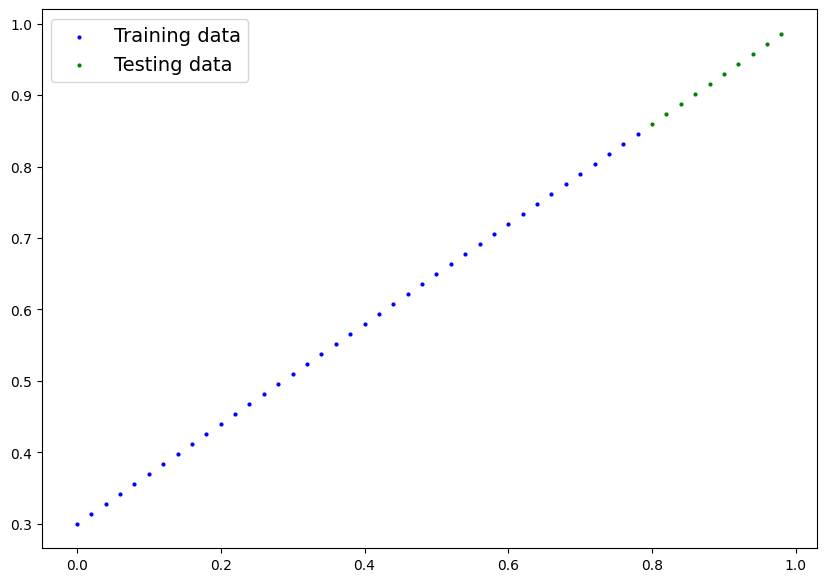

In [146]:
plot_predictions()

In [147]:
torch.manual_seed(42)
model_1 = linearRegModel()
model_1, model_1.state_dict()

(linearRegModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [148]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [149]:
next(model_1.parameters()).device

device(type='cpu')

In [150]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

In [151]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

### Training code 

In [152]:
loss_fn = torch.nn.L1Loss()

optimizer = torch.optim.SGD(params= model_1.parameters(),
                            lr=0.01)

In [153]:
X_train , y_train = X_train.to(device) , y_train.to(device)
X_test , y_test   = X_test.to(device) , y_test.to(device)

In [154]:
torch.manual_seed(42)

epochs = 200

for epoch in range(epochs):
  model_1.train()

  y_pred = model_1(X_train)

  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  ### Testing 

  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 ==0 :
      print( f"Epoch: {epoch} | Loss: {loss} | Test_loss: {test_loss}")

Epoch: 0 | Loss: 0.5551779866218567 | Test_loss: 0.5739762187004089
Epoch: 10 | Loss: 0.4399680495262146 | Test_loss: 0.4392663538455963
Epoch: 20 | Loss: 0.3247582018375397 | Test_loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954827964305878 | Test_loss: 0.16984674334526062
Epoch: 40 | Loss: 0.09433844685554504 | Test_loss: 0.03513689711689949
Epoch: 50 | Loss: 0.023886386305093765 | Test_loss: 0.04784906655550003
Epoch: 60 | Loss: 0.0199567973613739 | Test_loss: 0.04580312222242355
Epoch: 70 | Loss: 0.016517987474799156 | Test_loss: 0.0375305712223053
Epoch: 80 | Loss: 0.013089170679450035 | Test_loss: 0.029944902285933495
Epoch: 90 | Loss: 0.009653178043663502 | Test_loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215679459273815 | Test_loss: 0.014086711220443249
Epoch: 110 | Loss: 0.002787243574857712 | Test_loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test_loss: 0.013801807537674904
Epoch: 130 | Loss: 0.0012645035749301314 | Test_loss: 0.01380180753767

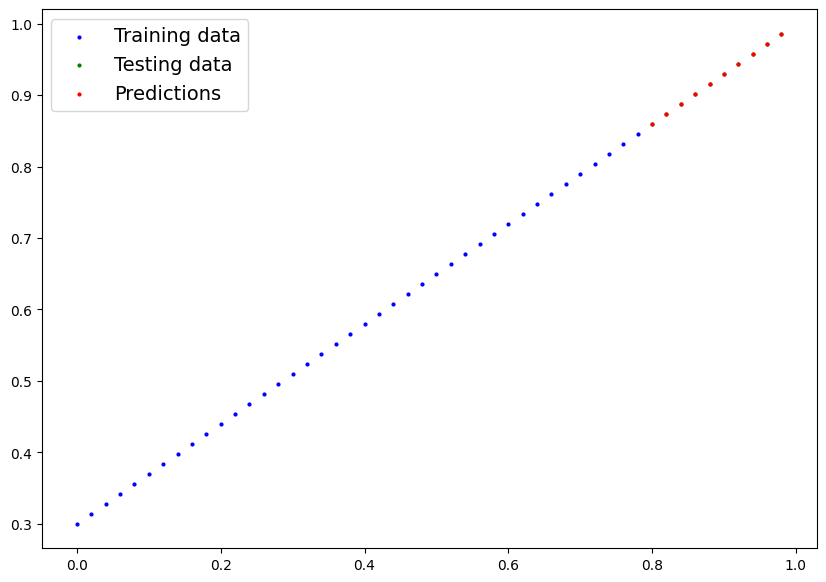

In [155]:
plot_predictions(predictions=test_pred.cpu())

In [156]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [157]:
weight, bias

(0.7, 0.3)

In [158]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)


Saving model to: models/01_pytorch_workflow_model_1.pth


In [159]:
loaded_model_1 = linearRegModel()

loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model_1.state_dict()
loaded_model_1.to(device)

linearRegModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [160]:
loaded_model_1.eval()
with torch.inference_mode():
  y_pred_loaded =loaded_model_1(X_test)

print(y_pred_loaded == test_pred) 

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])


### Neural Network

In [161]:
from sklearn.datasets import make_circles


# Make 1000 samples 
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03, # a little bit of noise to the dots
                    random_state=42)

In [162]:

# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


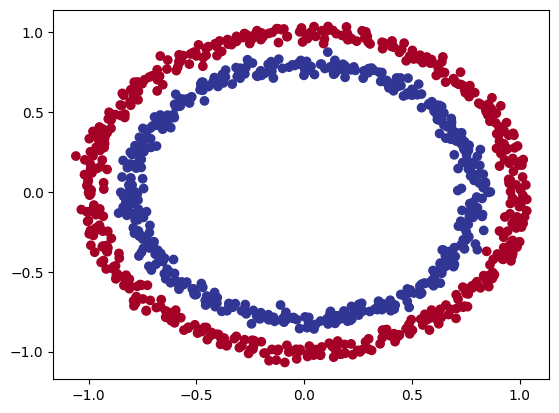

In [163]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0], 
            y=X[:, 1], 
            c=y, 
            cmap=plt.cm.RdYlBu);

In [164]:
# Turn data into tensors
# Otherwise this causes issues with computations later on
import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# View the first five samples
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [165]:

# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [166]:
# Standard PyTorch imports
import torch
from torch import nn
from helper_functions import accuracy_fn
# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [167]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


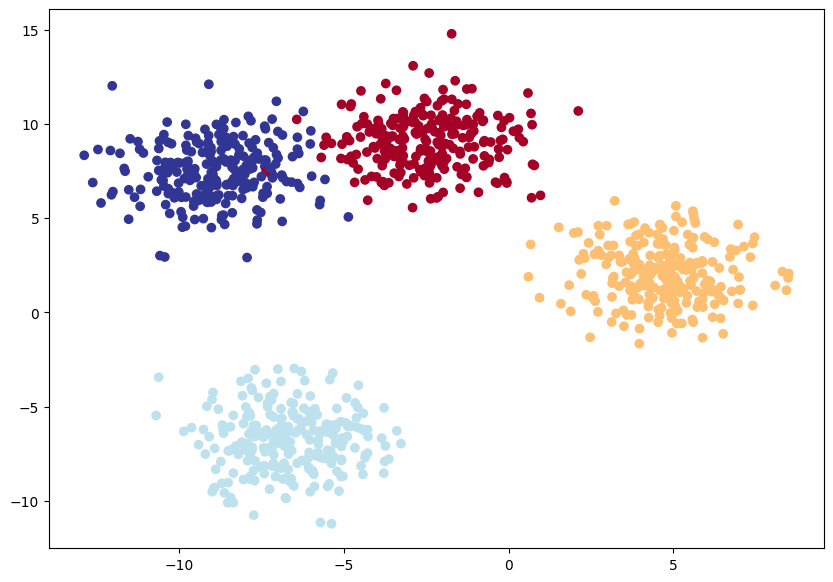

In [168]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

NUM_CLASSES = 4
NUM_FEATURES = 2 
RANDOM_SEED = 42

X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            cluster_std=1.5,
                            centers=NUM_CLASSES,
                            random_state=RANDOM_SEED)

X_blob, y_blob = torch.from_numpy(X_blob), torch.from_numpy(y_blob)

X_blob_train , X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                y_blob,
                                                                test_size=0.2,
                                                                random_state=RANDOM_SEED
                                                            )

plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu)

In [169]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [170]:
X_blob_train , X_blob_test, y_blob_train, y_blob_test = X_blob_train.to(device) , X_blob_test.to(device), y_blob_train.to(device), y_blob_test.to(device)

In [171]:
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()

    self.linear_layer = nn.Sequential(
        nn.Linear(in_features=input_features, 
                  out_features=hidden_units),
                  # nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=hidden_units),
                  # nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer(x)


In [172]:

model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [173]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1)

In [174]:
model_4(X_blob_train.type(torch.float)).dtype

torch.float32

In [175]:
X_blob_train.shape , y_blob_train[:10]

(torch.Size([800, 2]), tensor([1, 0, 2, 2, 0, 0, 0, 1, 3, 0]))

In [176]:
X_blob_train.dtype

torch.float64

###set up training  

In [177]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

X_blob_train , X_blob_test, y_blob_train, y_blob_test = X_blob_train.to(device) , X_blob_test.to(device), y_blob_train.to(device), y_blob_test.to(device)

for epoch in range(epochs):
  
  model_4.train()
  y_logits = model_4(X_blob_train.type(torch.float))
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true = y_blob_train,
                    y_pred=y_pred)
  
  optimizer.zero_grad()

  loss.backward()

  optimizer.step()



  ### Testing 
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test.type(torch.float))
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,
                           y_pred=test_preds)
    
  ## print out what's happenin'
  if epoch % 10 ==0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test loss: {test_loss: .4f}, Test acc: {test_acc:.2f}% ")



Epoch: 0 | Loss: 2.1810, Acc: 0.75% | Test loss:  0.7557, Test acc: 67.00% 
Epoch: 10 | Loss: 0.1804, Acc: 98.50% | Test loss:  0.1600, Test acc: 98.50% 
Epoch: 20 | Loss: 0.0921, Acc: 99.12% | Test loss:  0.0847, Test acc: 99.00% 
Epoch: 30 | Loss: 0.0653, Acc: 99.00% | Test loss:  0.0585, Test acc: 99.50% 
Epoch: 40 | Loss: 0.0531, Acc: 99.00% | Test loss:  0.0459, Test acc: 99.50% 
Epoch: 50 | Loss: 0.0462, Acc: 99.00% | Test loss:  0.0387, Test acc: 99.50% 
Epoch: 60 | Loss: 0.0418, Acc: 99.00% | Test loss:  0.0341, Test acc: 99.50% 
Epoch: 70 | Loss: 0.0389, Acc: 99.00% | Test loss:  0.0308, Test acc: 99.50% 
Epoch: 80 | Loss: 0.0367, Acc: 99.00% | Test loss:  0.0284, Test acc: 99.50% 
Epoch: 90 | Loss: 0.0351, Acc: 99.00% | Test loss:  0.0266, Test acc: 99.50% 


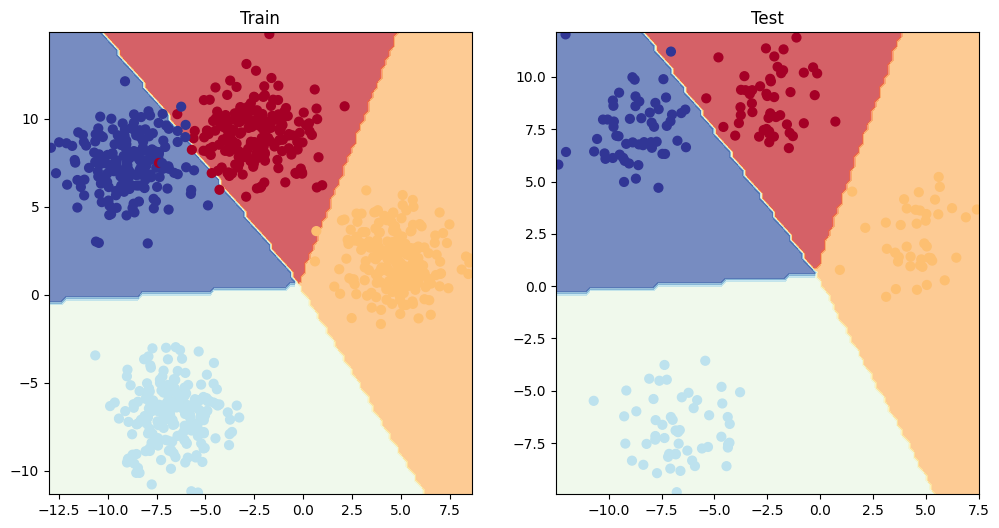

In [178]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2 , 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

##CNN

In [179]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt


In [181]:
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root= "data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26421880/26421880 [00:02<00:00, 12413451.32it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 210446.04it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3931920.60it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 7505136.25it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [182]:
len(train_data), len(test_data)

(60000, 10000)

In [184]:
img, label= train_data[0]

img, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [186]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [187]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [189]:
img.shape, class_names[label]

(torch.Size([1, 28, 28]), 'Ankle boot')

(-0.5, 27.5, 27.5, -0.5)

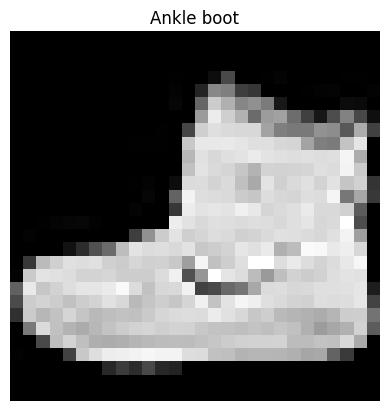

In [192]:
img , label = train_data[0]

plt.imshow(img.squeeze(dim=0), cmap="gray")
plt.title(class_names[label])
plt.axis("off")

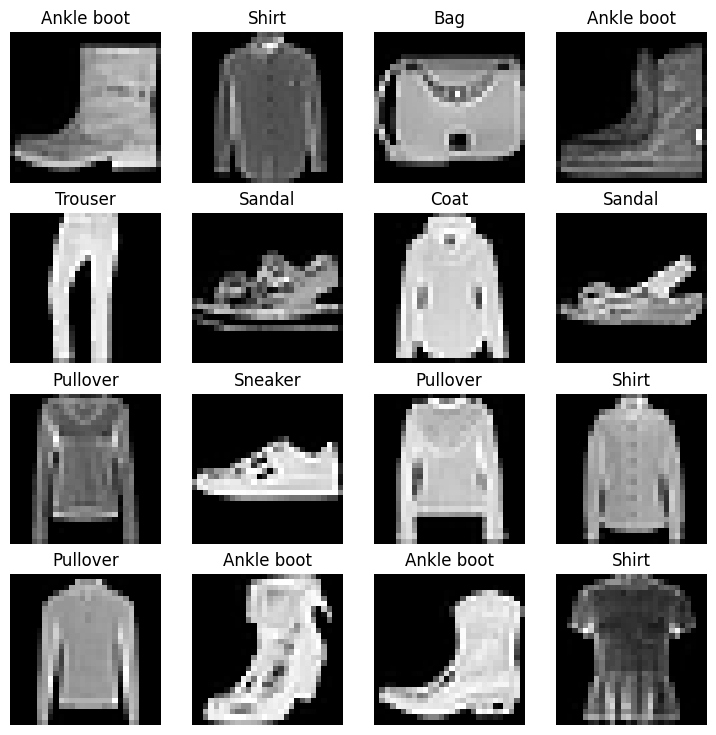

In [196]:
torch.manual_seed(42)

fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4

for i in range(1, rows*cols+1):
  random_idx = torch.randint(0 , len(train_data), size=[1]).item()
  # print(random_idx)
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(dim=0), cmap="gray")
  plt.title(class_names[label])
  plt.axis("off")



In [197]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [198]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                             batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)


In [203]:
train_dataloader.batch_size, len(train_dataloader), len(test_dataloader)

(32, 1875, 313)

In [206]:
from torch.nn.modules.pooling import MaxPool2d
class fashionMNISTModelV2(nn.Module):
  """TinyVGG"""

  def __init__(self, input_shape: int, 
               hidden_units: int, 
               output_shape: int):
    super().__init__() 
    
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels= hidden_units,
                  kernel_size=3,
                  stride=1, 
                  padding=1),


        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),

        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units * 1,
                  out_features=output_shape)
        
    )


  def forward(self, x):
    z = self.conv_block_1(x)
    print(z.shape)

    z= self.conv_block_2(z)
    print(z.shape)

    z= self.classifier(z)
    print(z.shape)
    
  
   

In [207]:
torch.manual_seed(42)
model_2 = fashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=10)